In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open("euler1.txt") as f11:
    data11 = f11.readlines()
with open("rungekutta1.txt") as f21:
    data21 = f21.readlines()
with open("adamsbashforth1.txt") as f31:
    data31 = f31.readlines()
with open("euler2.txt") as f12:
    data12 = f12.readlines()
with open("rungekutta2.txt") as f22:
    data22 = f22.readlines()
with open("adamsbashforth2.txt") as f32:
    data32 = f32.readlines() 

In [4]:
xi1 = []
xi2 = []
y11 = []
y12 = []
y21 = []
y22 = []
y31 = []
y32 = []
for line in data11:
    xi1.append(float(line[:line.find('\t')]))
    y11.append(float(line[line.find('\t'):]))
for line in data21:
    y21.append(float(line[line.find('\t'):]))
for line in data31:
    y31.append(float(line[line.find('\t'):]))
    
for line in data12:
    xi2.append(float(line[:line.find('\t')]))
    y12.append(float(line[line.find('\t'):]))
for line in data22:
    y22.append(float(line[line.find('\t'):]))
for line in data32:
    y32.append(float(line[line.find('\t'):]))

In [5]:
def u0(x):
    return np.exp(-np.sinh(x)) + x

In [6]:
x = np.linspace(0, 1, 50)
y = [u0(t) for t in x]

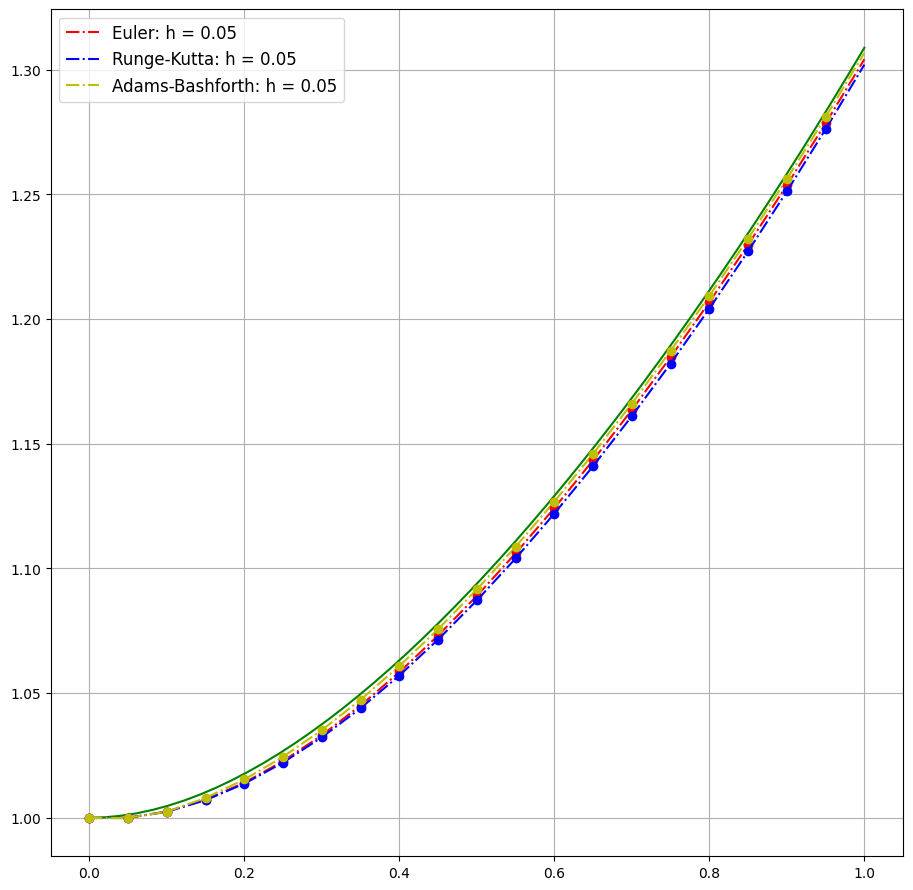

In [7]:
plt.figure(figsize=(11, 11))
plt.plot(x, y, 'g')

plt.plot(xi1[0], y11[0], 'ro')
plt.plot(xi1[0:2], y11[0:2], 'r-.', label = "Euler: h = 0.05")
plt.plot(xi1[0], y21[0], 'bo')
plt.plot(xi1[0:2], y21[0:2], 'b-.', label = "Runge-Kutta: h = 0.05")
plt.plot(xi1[0], y31[0], 'yo')
plt.plot(xi1[0:2], y31[0:2], 'y-.', label = "Adams-Bashforth: h = 0.05")
for i in range(2, len(xi1)):
    plt.plot(xi1[i-1], y11[i-1], 'ro')
    plt.plot(xi1[i-1:i+1], y11[i-1:i+1], 'r-.')
    plt.plot(xi1[i-1], y21[i-1], 'bo')
    plt.plot(xi1[i-1:i+1], y21[i-1:i+1], 'b-.')
    plt.plot(xi1[i-1], y31[i-1], 'yo')
    plt.plot(xi1[i-1:i+1], y31[i-1:i+1], 'y-.')
    
plt.grid()
plt.legend(fontsize = 12)
plt.show()

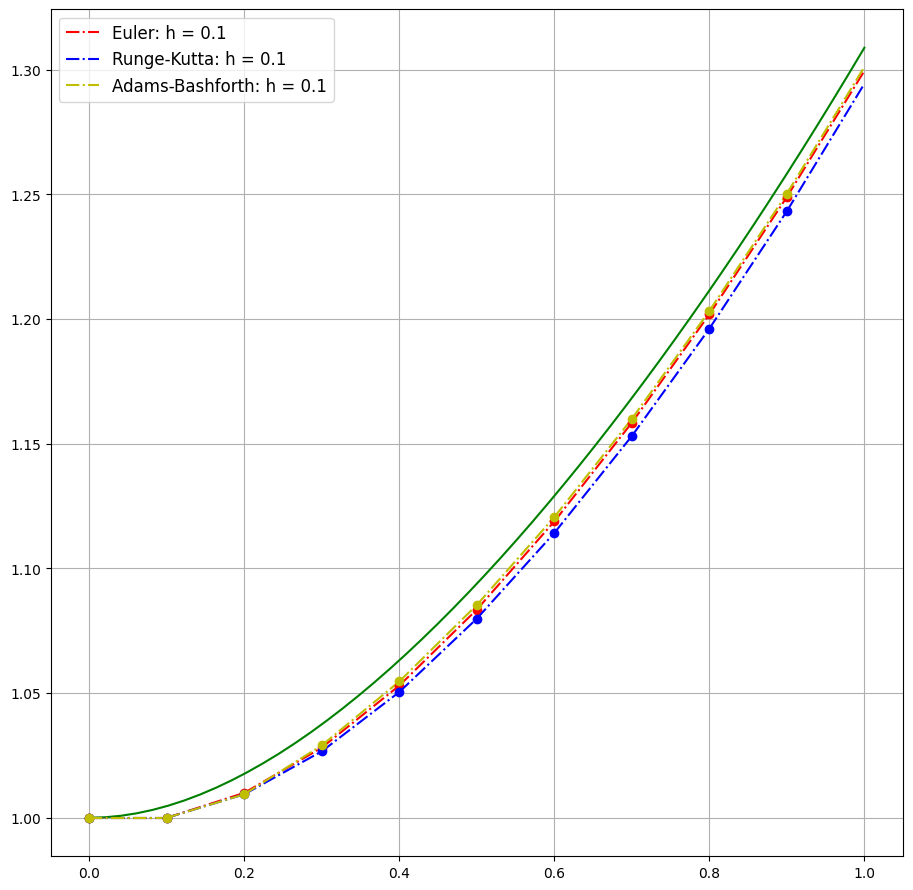

In [8]:
plt.figure(figsize=(11, 11))
plt.plot(x, y, 'g')

plt.plot(xi2[0], y12[0], 'ro')
plt.plot(xi2[0:2], y12[0:2], 'r-.', label = "Euler: h = 0.1")
plt.plot(xi2[0], y22[0], 'bo')
plt.plot(xi2[0:2], y22[0:2], 'b-.', label = "Runge-Kutta: h = 0.1")
plt.plot(xi2[0], y32[0], 'yo')
plt.plot(xi2[0:2], y32[0:2], 'y-.', label = "Adams-Bashforth: h = 0.1")
for i in range(2, len(xi2)):
    plt.plot(xi2[i-1], y12[i-1], 'ro')
    plt.plot(xi2[i-1:i+1], y12[i-1:i+1], 'r-.')
    plt.plot(xi2[i-1], y22[i-1], 'bo')
    plt.plot(xi2[i-1:i+1], y22[i-1:i+1], 'b-.')
    plt.plot(xi2[i-1], y32[i-1], 'yo')
    plt.plot(xi2[i-1:i+1], y32[i-1:i+1], 'y-.')
    
plt.grid()
plt.legend(fontsize = 12)
plt.show()

In [9]:
erf11 = [abs(y11[i] - u0(xi1[i])) for i in range(len(xi1))]
erf21 = [abs(y21[i] - u0(xi1[i])) for i in range(len(xi1))]
erf31 = [abs(y31[i] - u0(xi1[i])) for i in range(len(xi1))]

erf12 = [abs(y12[i] - u0(xi2[i])) for i in range(len(xi2))]
erf22 = [abs(y22[i] - u0(xi2[i])) for i in range(len(xi2))]
erf32 = [abs(y32[i] - u0(xi2[i])) for i in range(len(xi2))]

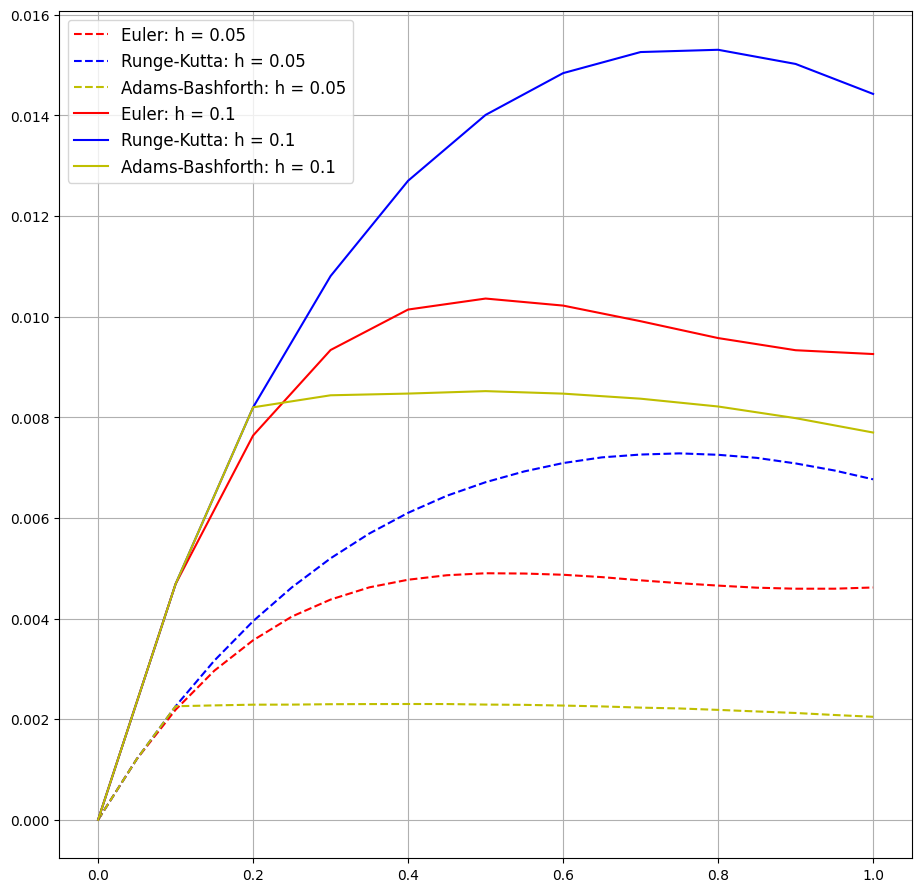

In [10]:
plt.figure(figsize=(11, 11))

plt.plot(xi1, erf11, 'r--', label = "Euler: h = 0.05")
plt.plot(xi1, erf21, 'b--', label = "Runge-Kutta: h = 0.05")
plt.plot(xi1, erf31, 'y--', label = "Adams-Bashforth: h = 0.05")

plt.plot(xi2, erf12, 'r', label = "Euler: h = 0.1")
plt.plot(xi2, erf22, 'b', label = "Runge-Kutta: h = 0.1")
plt.plot(xi2, erf32, 'y', label = "Adams-Bashforth: h = 0.1")

plt.grid()
plt.legend(fontsize = 12)
plt.show()

In [11]:
runge1 = [abs(y11[2*i] - y12[i]) for i in range(len(xi2))]
runge2 = [abs(y21[2*i] - y22[i])/15 for i in range(len(xi2))]
runge3 = [abs(y31[2*i] - y32[i])/7 for i in range(len(xi2))]


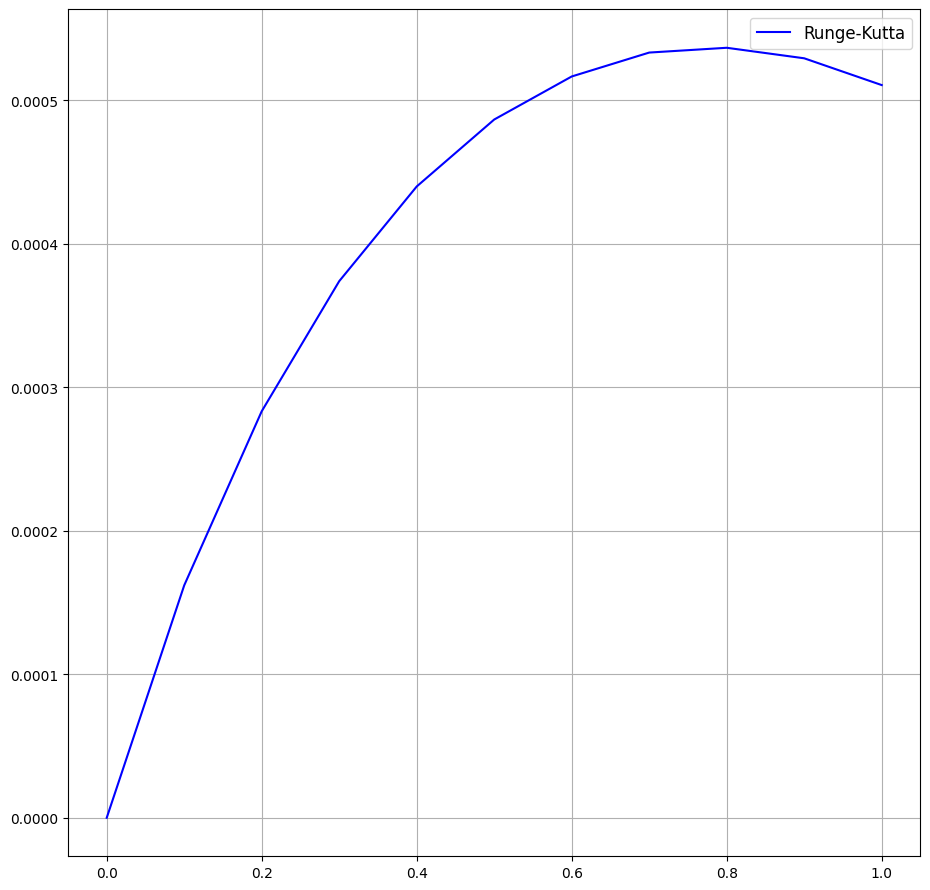

In [12]:
plt.figure(figsize=(11, 11))

#plt.plot(xi2, runge1, 'r', label = "Euler")
plt.plot(xi2, runge2, 'b', label = "Runge-Kutta")
#plt.plot(xi2, runge3, 'y', label = "Adams-Bashforth")

plt.grid()
plt.legend(fontsize = 12)
plt.show()